### **Artificial Neural Network**

#### **Part 1 - Data Preprocessing**

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
dataset = pd.read_csv('/gdrive/My Drive/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [4]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [5]:
## Concatenate the Data Frames
X=pd.concat([X,geography,gender],axis=1)

In [6]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### **Part 2 - Now let's make the ANN!**

In [9]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [10]:
# Initialising the ANN
classifier = Sequential()

In [11]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units= 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))
#classifier.add(Dropout(0.3))

In [12]:
# Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer = 'he_uniform',activation='relu'))
#classifier.add(Dropout(0.4))

In [13]:
# Adding the output layer
classifier.add(Dense(units= 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
#classifier.add(Dropout(0.2))

In [14]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [22]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5658 - accuracy: 0.7914 - val_loss: 0.5249 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5196 - accuracy: 0.7962 - val_loss: 0.5010 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4975 - accuracy: 0.7962 - val_loss: 0.4856 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4821 - accuracy: 0.7962 - val_loss: 0.4749 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4713 - accuracy: 0.7962 - val_loss: 0.4673 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4631 - accuracy: 0.7962 - val_loss: 0.4611 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4563 - accuracy: 0.7962 - val_loss: 0.4560 - val_accuracy: 0.7955

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


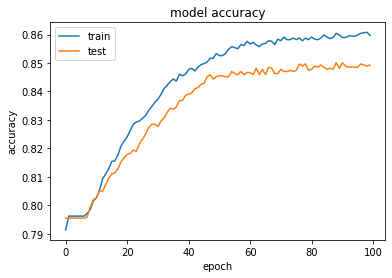

In [23]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

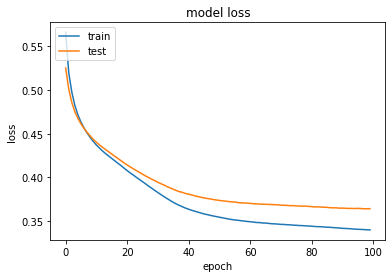

In [24]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### **Part 3 - Making the predictions and evaluating the model**

In [29]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [30]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1495,  100],
       [ 207,  198]])

In [31]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8465